# Help International - Assisgnment 

1. Importing and Understanding data
2. Data Engineering and treatment 
3. Exploratory data anlaysis
4. Preparing data for Clustering 
5. K-means clustering 
6. Hierarchical clustering 


### 1. Importing and Understanding data

In [1]:
#Importing required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
df = pd.read_csv(r'C:\Users\PriyankaGill\Downloads\Country-data.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info() #there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe() #analysing data 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2. Data Engineering and treatment

In [5]:
# converting Imports, exports and health to thier original value as they are percntage of GDPP
df['imports']=(df['imports']/100)*df['gdpp']
df['exports']=(df['exports']/100)*df['gdpp']
df['health']=(df['health']/100)*df['gdpp']

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


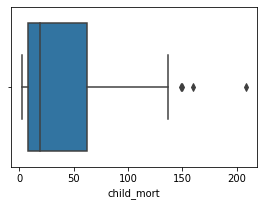

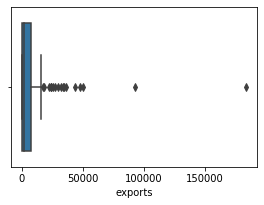

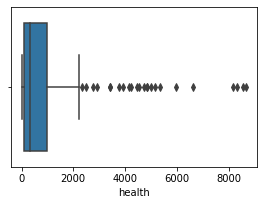

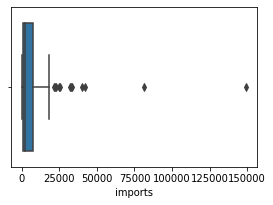

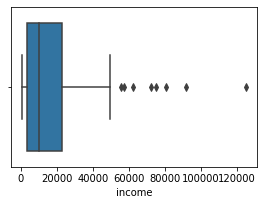

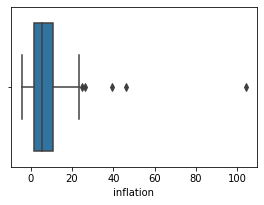

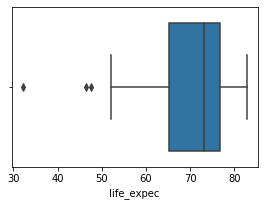

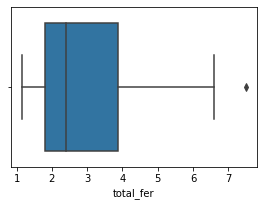

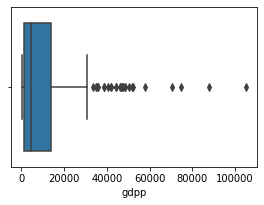

In [7]:
# Checking outliers in the dataset.

feature=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
    
for i in enumerate(feature): 
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.show()

In [8]:
# selecting features which required to be capped.
feature=['exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

In [9]:
#Treating outliers 

for i in enumerate(feature):
    val=df[i[1]].quantile(0.90)  #using 90 percentile to cap the countries.
    df[i[1]][df[i[1]]>=val]=val

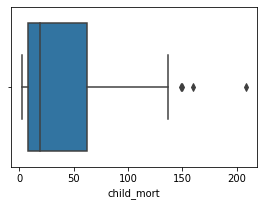

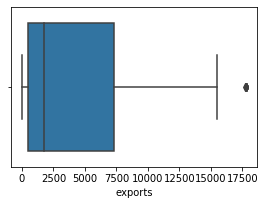

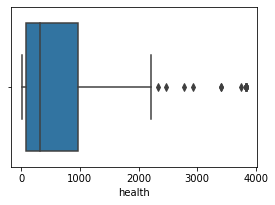

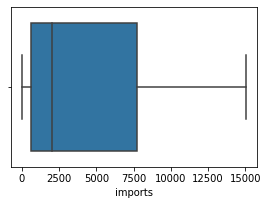

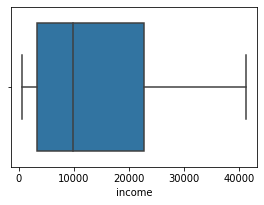

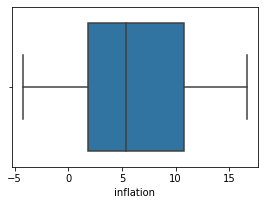

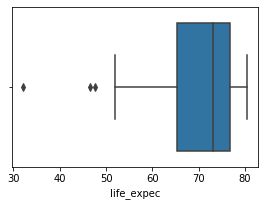

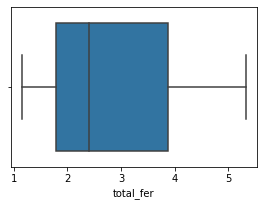

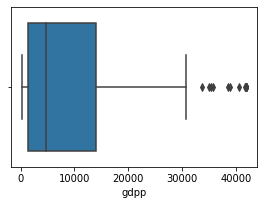

In [10]:
#checking boxplot after outlier treatment 


feature=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
    
for i in enumerate(feature): 
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.show()

### 3. Exploratory data anlaysis

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.322,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.650,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.890,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,16.64,60.1,5.322,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.130,12200


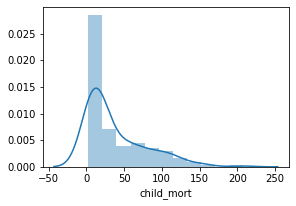

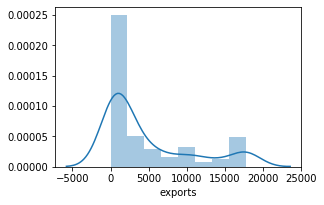

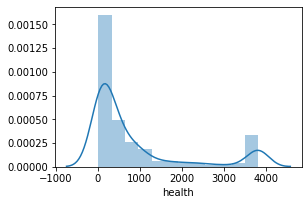

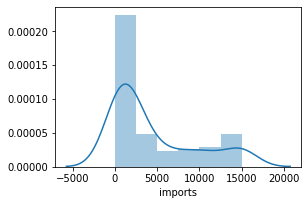

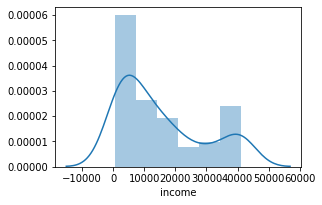

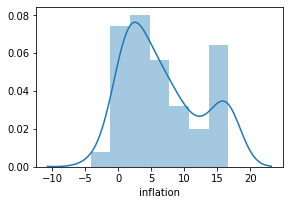

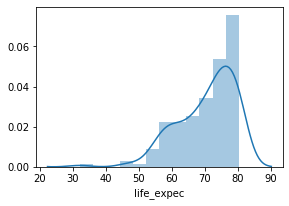

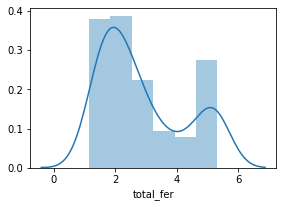

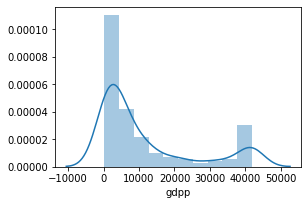

In [12]:
#checking the distribution of the features

feature=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
    
for i in enumerate(feature): 
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.show()

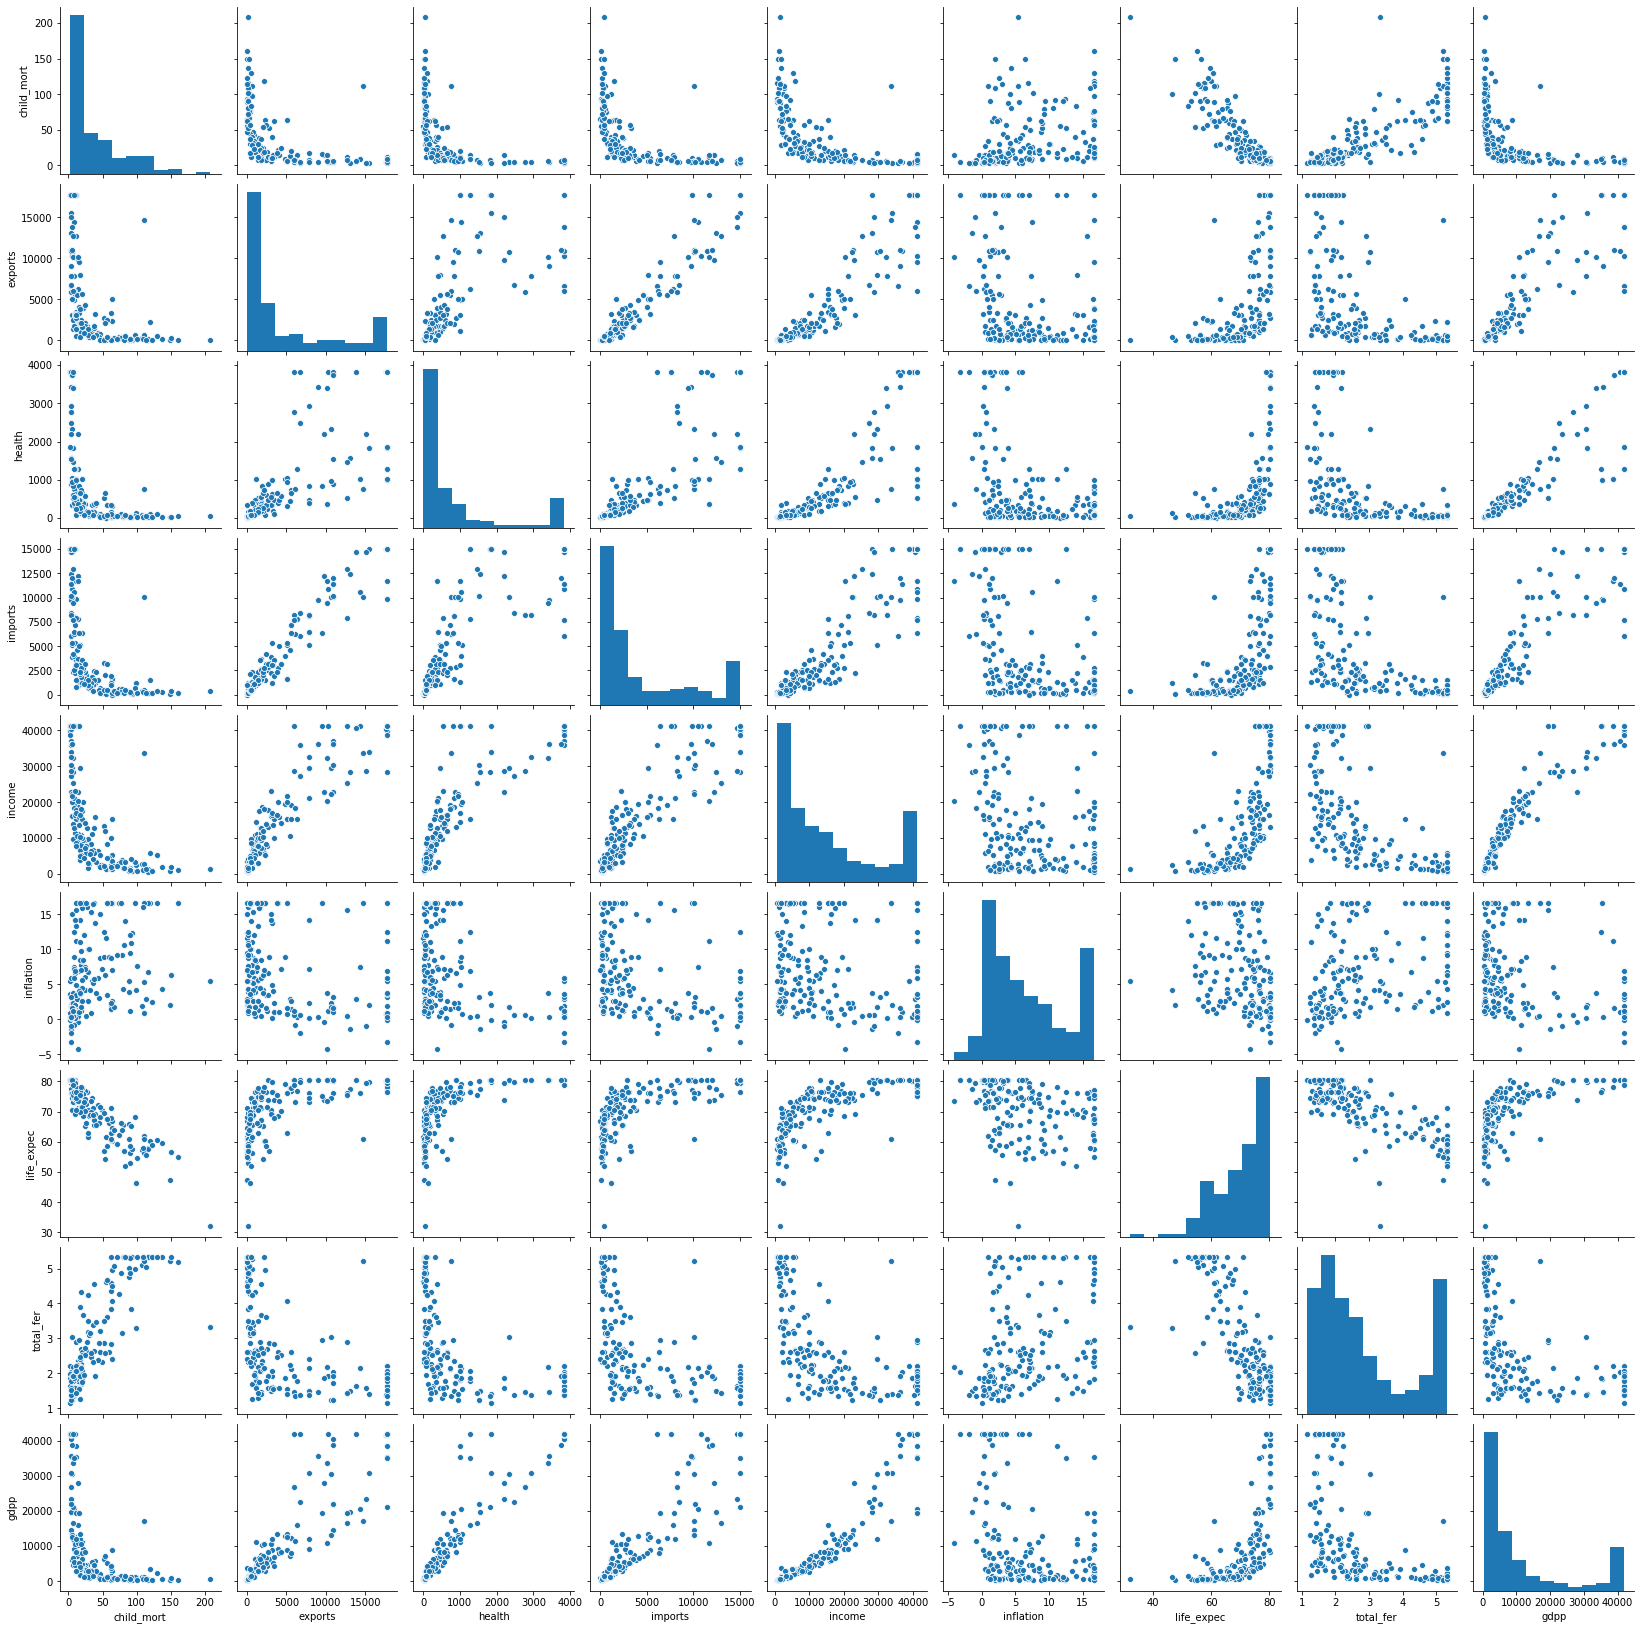

In [13]:
sns.pairplot(df)  # cheking the bivariante relationship among the features

Export and imports shows linear relationship which tells lack of trade deficiet overall.
GDP shows linear relation with imports, exports, health, income.

### 4. Preparing data for clustering  

In [14]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
hopkins(df.drop('country',axis=1)) 

0.9015561411209996

Good hopkins score for clustering 

In [16]:
df_2 = df.copy()

In [17]:
df_2.columns 

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [18]:
# scaling the features using standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_2 = scaler.fit_transform(df_2.drop('country',axis=1))

In [19]:
df_2 = pd.DataFrame(df_2)
df_2.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
df_2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.797286,-0.676933,-0.841497,-0.994369,0.497660,-1.631574,1.794429,-0.786811
1,-0.538949,-0.611636,-0.490352,-0.493824,-0.386326,-0.368728,0.671013,-0.900682,-0.531304
2,-0.272833,-0.514980,-0.557985,-0.611211,-0.169272,1.663346,0.693925,0.009432,-0.504576
3,2.007808,-0.432103,-0.628477,-0.588439,-0.680847,1.757861,-1.184803,1.794429,-0.571758
4,-0.695634,0.138833,-0.104136,0.545147,0.283837,-0.902563,0.728292,-0.548380,0.054549


### 5. K-means clustering

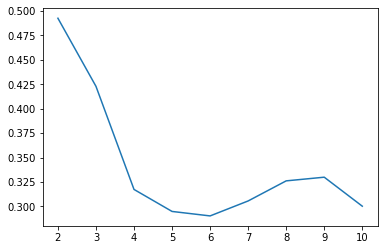

In [20]:
# Let's find out the value of K
# Silhouette Score
# Elbow Curve

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df_2)
    ss.append([k, silhouette_score(df_2, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

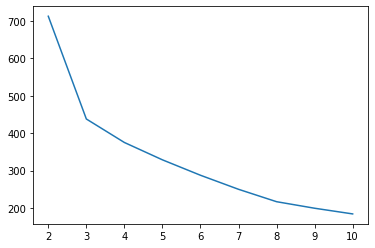

In [21]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_2)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

K=3 will be the good choice according to the plots

In [60]:
kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(df_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [23]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])
label

,label
0,1
1,2
2,2
3,1
4,2
...,...
162,2
163,2
164,2
165,1


In [24]:
df_final = df.copy()

In [25]:
df_final = pd.concat([df_final, label ], axis =1)

In [26]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.322,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.650,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.890,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,16.64,60.1,5.322,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.130,12200,2


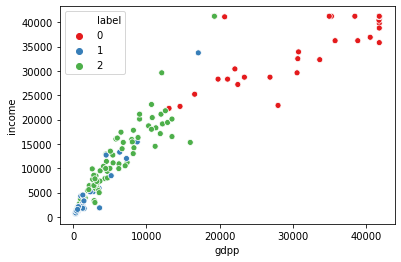

In [27]:
#Plot to see the clusters formation 
sns.scatterplot(x = 'gdpp', y='income', hue='label', data =df_final, palette = 'Set1') 

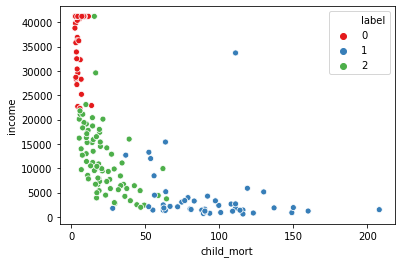

In [28]:
sns.scatterplot(x = 'child_mort', y='income', hue='label', data =df_final, palette = 'Set1')

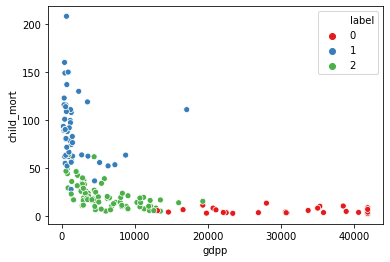

In [29]:
sns.scatterplot(x = 'gdpp', y='child_mort', hue='label', data =df_final, palette = 'Set1')

In [30]:
df_final.label.value_counts() #number of countries under each label

2    78
1    49
0    40
Name: label, dtype: int64

In [31]:
df_final['child_mort']=df_final['child_mort']*100 # scaling up to visualize better 

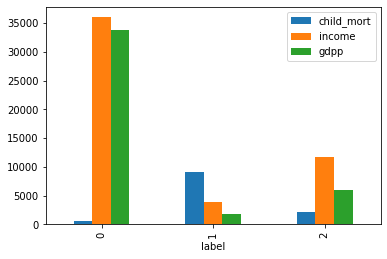

In [32]:
df_final.drop(['exports','health','imports','inflation','life_expec','total_fer'],axis = 1).groupby('label').mean().plot(kind = 'bar')

From the plots we can see that countries with label 1 are the ones which we will be targeting 

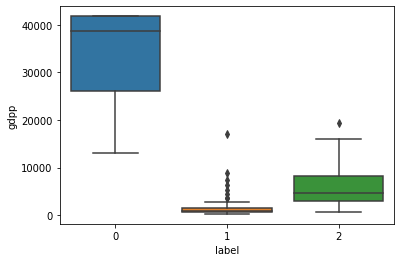

In [33]:
#boxplot to visualize each cluster profile feature 
sns.boxplot(x='label', y='gdpp', data=df_final)

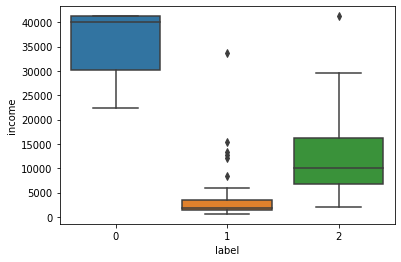

In [34]:
sns.boxplot(x='label', y='income', data=df_final)

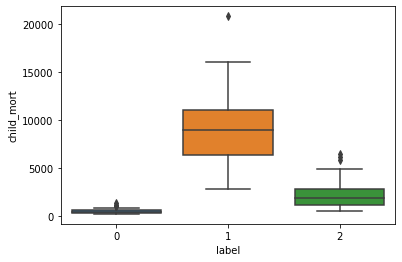

In [35]:
sns.boxplot(x='label', y='child_mort', data=df_final)

In [36]:
df_final[df_final['label'] ==1]['country'] #Countries in need of aid

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [37]:
#Getting Top 5 countries in direst need of aid. 

df_final[df_final['label'] ==1].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,20800.0,101.286,45.7442,428.314,1500,5.45,32.1,3.330,662,1
132,Sierra Leone,16000.0,67.032,52.2690,137.655,1220,16.64,55.0,5.200,399,1
32,Chad,15000.0,330.096,40.6341,390.195,1930,6.39,56.5,5.322,897,1
31,Central African Republic,14900.0,52.628,17.7508,118.190,888,2.01,47.5,5.210,446,1
97,Mali,13700.0,161.424,35.2584,248.508,1870,4.37,59.5,5.322,708,1


In [38]:
df_final[df_final['label'] ==1].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,9360.0,20.6052,26.7960,90.552,764,12.30,57.7,5.322,231,1
88,Liberia,8930.0,62.4570,38.5860,302.802,700,5.47,60.8,5.020,327,1
37,"Congo, Dem. Rep.",11600.0,137.2740,26.4194,165.664,609,16.64,57.5,5.322,334,1
112,Niger,12300.0,77.2560,17.9568,170.868,814,2.55,58.8,5.322,348,1
132,Sierra Leone,16000.0,67.0320,52.2690,137.655,1220,16.64,55.0,5.200,399,1


In [39]:
df_final[df_final['label'] ==1].sort_values(by = ['income', 'gdpp','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",11600.0,137.2740,26.4194,165.664,609,16.64,57.5,5.322,334,1
88,Liberia,8930.0,62.4570,38.5860,302.802,700,5.47,60.8,5.020,327,1
26,Burundi,9360.0,20.6052,26.7960,90.552,764,12.30,57.7,5.322,231,1
112,Niger,12300.0,77.2560,17.9568,170.868,814,2.55,58.8,5.322,348,1
31,Central African Republic,14900.0,52.6280,17.7508,118.190,888,2.01,47.5,5.210,446,1


Results from K-means Clustering

Following are the top 5 countries in direst need of aid.
1. Burundi
2. Congo, Dem Rep
3. Central African Republic
4. Liberia 
5. Haiti 


### 6. Hierarchical Clustering 

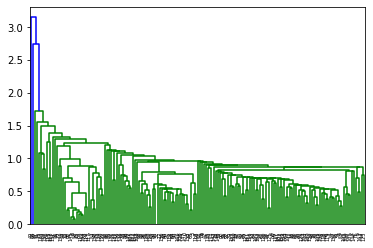

In [40]:
# single linkage
mergings = linkage(df_2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [41]:
labels = cut_tree(mergings,n_clusters=3).reshape(-1)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
df_final['label_H']=labels

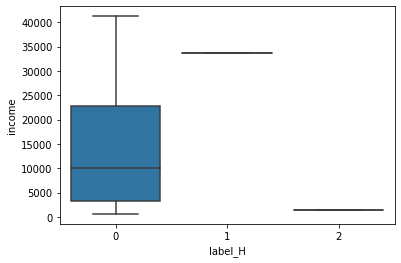

In [43]:
sns.boxplot(data=df_final,x='label_H',y='income')

Clearly single linkage method will not give desired results.

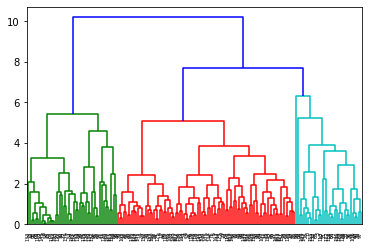

In [62]:
#Using complete linkage 

mergings = linkage(df_2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Taking K=3, As it seems most suitable

In [45]:
labels = cut_tree(mergings,n_clusters=3).reshape(-1)
labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [46]:
df_final['label_H']=labels

In [47]:
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,label_H
0,Afghanistan,9020.0,55.30,41.9174,248.297,1610,9.44,56.2,5.322,553,1,0
1,Albania,1660.0,1145.20,267.8950,1987.740,9930,4.49,76.3,1.650,4090,2,1
2,Algeria,2730.0,1712.64,185.9820,1400.440,12900,16.10,76.5,2.890,4460,2,1
3,Angola,11900.0,2199.19,100.6050,1514.370,5900,16.64,60.1,5.322,3530,1,0
4,Antigua and Barbuda,1030.0,5551.00,735.6600,7185.800,19100,1.44,76.8,2.130,12200,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,2920.0,1384.02,155.9250,1565.190,2950,2.62,63.0,3.500,2970,2,1
163,Venezuela,1710.0,3847.50,662.8500,2376.000,16500,16.64,75.4,2.470,13500,2,1
164,Vietnam,2330.0,943.20,89.6040,1050.620,4490,12.10,73.1,1.950,1310,2,1
165,Yemen,5630.0,393.00,67.8580,450.640,4480,16.64,67.5,4.670,1310,1,1


In [48]:
df_final['label_H'].value_counts()

1    89
2    45
0    33
Name: label_H, dtype: int64

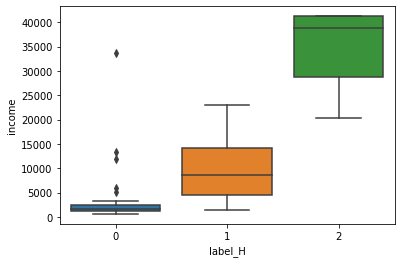

In [49]:
sns.boxplot(data=df_final,x='label_H',y='income')

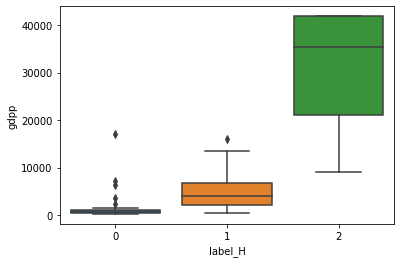

In [50]:
sns.boxplot(data=df_final,x='label_H',y='gdpp')

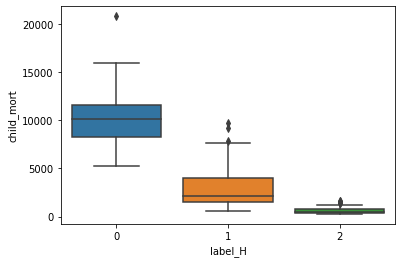

In [51]:
sns.boxplot(data=df_final,x='label_H',y='child_mort')

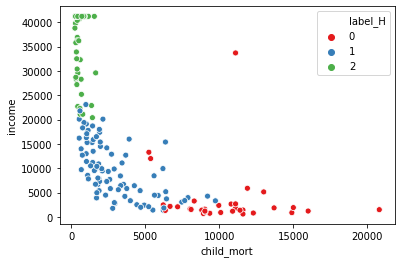

In [52]:
sns.scatterplot(x = 'child_mort', y='income', hue='label_H', data =df_final, palette = 'Set1')

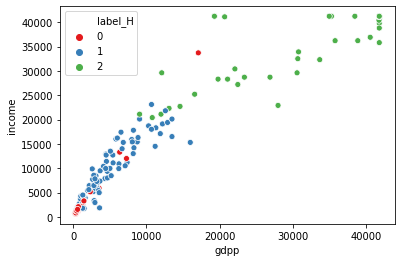

In [53]:
sns.scatterplot(x = 'gdpp', y='income', hue='label_H', data =df_final, palette = 'Set1')

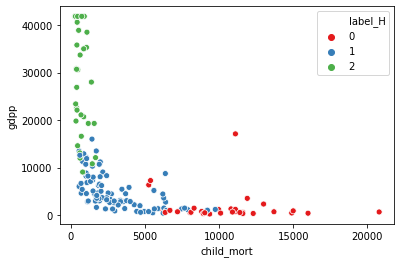

In [54]:
sns.scatterplot(x = 'child_mort', y='gdpp', hue='label_H', data =df_final, palette = 'Set1')

In [55]:
df_final[df_final['label_H'] ==0].sort_values(by = ['income', 'gdpp','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,label_H
37,"Congo, Dem. Rep.",11600.0,137.2740,26.4194,165.664,609,16.64,57.5,5.322,334,1,0
88,Liberia,8930.0,62.4570,38.5860,302.802,700,5.47,60.8,5.020,327,1,0
26,Burundi,9360.0,20.6052,26.7960,90.552,764,12.30,57.7,5.322,231,1,0
112,Niger,12300.0,77.2560,17.9568,170.868,814,2.55,58.8,5.322,348,1,0
31,Central African Republic,14900.0,52.6280,17.7508,118.190,888,2.01,47.5,5.210,446,1,0


In [56]:
df_final[df_final['label_H'] ==0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,label_H
26,Burundi,9360.0,20.6052,26.7960,90.552,764,12.30,57.7,5.322,231,1,0
88,Liberia,8930.0,62.4570,38.5860,302.802,700,5.47,60.8,5.020,327,1,0
37,"Congo, Dem. Rep.",11600.0,137.2740,26.4194,165.664,609,16.64,57.5,5.322,334,1,0
112,Niger,12300.0,77.2560,17.9568,170.868,814,2.55,58.8,5.322,348,1,0
132,Sierra Leone,16000.0,67.0320,52.2690,137.655,1220,16.64,55.0,5.200,399,1,0


In [57]:
df_final[df_final['label_H'] ==0].sort_values(by = ['child_mort', 'gdpp','income'], ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,label_H
66,Haiti,20800.0,101.286,45.7442,428.314,1500,5.45,32.1,3.330,662,1,0
132,Sierra Leone,16000.0,67.032,52.2690,137.655,1220,16.64,55.0,5.200,399,1,0
32,Chad,15000.0,330.096,40.6341,390.195,1930,6.39,56.5,5.322,897,1,0
31,Central African Republic,14900.0,52.628,17.7508,118.190,888,2.01,47.5,5.210,446,1,0
97,Mali,13700.0,161.424,35.2584,248.508,1870,4.37,59.5,5.322,708,1,0


Following countries can be considered as in direst need of aid. 

1. Liberia
2. Central African Republic
3. Congo, Dem Rep.
4. Haiti 
5. Burundi 

### 7. Results

We can choose countries from K-means analysis as it although both the results look similar.

Following are the top 5 countries in direst need of aid.


1. Burundi
2. Congo, Dem Rep
3. Central African Republic
4. Liberia 
5. Haiti 